In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math

% matplotlib inline

This class was originally seen on https://github.com/pytorch/pytorch/issues/1333 and I am just trying to understand it so that I will then be able to do my own

In [47]:
class CausalConv1d(nn.Conv1d):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, dilation=1, groups=1, bias=True):
        super(CausalConv1d, self).__init__( in_channels, out_channels, kernel_size, stride=stride, padding=0,
            dilation=dilation, groups=groups, bias=bias)

        self.left_padding = dilation * (kernel_size - 1)

    def forward(self, input):

        temp = torch.unsqueeze(input, 0)

        x = F.pad(temp, (self.left_padding, 0, 0, 0))

        x = torch.squeeze(x, 0)

# #         self.weight = nn.Parameter(torch.Tensor([[[2, 0]]]))
#         self.weight = nn.Parameter(torch.randn(1,1,2))
#         self.bias = nn.Parameter(torch.Tensor([0]))
        
        return super(CausalConv1d, self).forward(x)

In [48]:
causal = CausalConv1d(1, 1, 2)
print(causal)

CausalConv1d (1, 1, kernel_size=(2,), stride=(1,))


In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(causal.parameters(), lr=0.001, momentum=0.9)

In [50]:
b = pd.read_csv("file_path.csv", header=None)

In [51]:
v = np.array(b)

loss: 5.128
loss: 5.770
loss: 6.800
loss: 7.436
loss: 7.247
loss: 5.995
loss: 8.065
loss: 8.837
loss: 6.439
loss: 6.833
loss: 9.696
loss: 6.143
loss: 7.878
loss: 7.983
loss: 6.342
loss: 6.208
loss: 8.464
loss: 6.636
loss: 8.397
loss: 7.353
loss: 7.632
loss: 6.114
loss: 5.093
loss: 6.458
loss: 5.935
loss: 6.600
loss: 6.223
loss: 6.576
loss: 6.627
loss: 6.003
loss: 6.856
loss: 7.112
loss: 6.522
loss: 6.978
loss: 6.394
loss: 8.131
loss: 6.208
loss: 7.190
loss: 7.756
loss: 6.764
loss: 6.288
loss: 7.918
loss: 7.383
loss: 8.830
loss: 7.196
loss: 7.304
loss: 6.745
loss: 5.806
loss: 7.263
loss: 7.169
loss: 9.130
loss: 6.136
loss: 6.424
loss: 5.487
loss: 5.079
loss: 4.871
loss: 8.728
loss: 6.008
loss: 7.440
loss: 6.942
loss: 6.978
loss: 6.274
loss: 6.690
loss: 6.058
loss: 7.160
loss: 6.619
loss: 6.170
loss: 6.691
loss: 8.350
loss: 5.027
loss: 8.815
loss: 7.950
loss: 6.963
loss: 6.829
loss: 9.169
loss: 8.286
loss: 5.798
loss: 7.493
loss: 6.055
loss: 8.270
loss: 7.479
loss: 6.457
loss: 5.685
loss

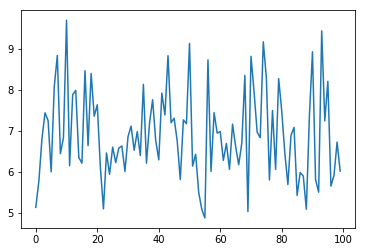

In [52]:
running_loss = 0.0
i = 0
temp = []
for row in v:
    
    # get the inputs
    inputs = row[0:99].astype(np.float)
    target = row[99:100]

    # wrap them in Variable
#     target = Variable(torch.Tensor(target)).type(torch.LongTensor)
#     inputs = Variable(torch.Tensor([[inputs]]))
    
    target = Variable(torch.Tensor(target)).type(torch.LongTensor)
    inputs = Variable(torch.Tensor([[inputs]]))
    
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = causal(inputs)
    outputs = torch.squeeze(outputs, 0)
    loss = criterion(outputs, target)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.data[0]
    if i % 100 == 99:
        temp.append(running_loss/100)
        print('loss: %.3f' % (running_loss / 100))
        running_loss = 0.0

    i+=1
    
plt.plot(temp)
plt.show

print('Finished Training')

# Generating and saving sine data

In [26]:
def SinGenerator():
    start = np.random.randint(-10, 10, size=1)
    x = np.linspace(start, start+2*np.pi, 100)
    sine = (np.sin(x) + 1 )* 30
    sine = np.ndarray.astype(sine, int)
    return sine

In [ ]:
sine = SinGenerator()
plt.plot(sine)
plt.show

In [35]:
data = []
for _ in range(10000):
    data.append(SinGenerator())

In [36]:
df = pd.DataFrame(data)
df.to_csv("file_path.csv", index=False, header=False)